In [1]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd

Using TensorFlow backend.


In [2]:
dat = keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = dat.load_data()

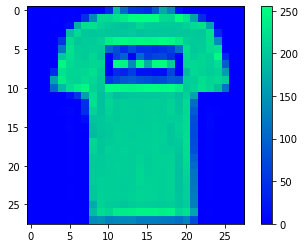

In [3]:
plt.imshow(train_images[1],cmap="winter")
plt.colorbar()
plt.show()

From the colorbar above we see the values are in the range from 0 to 255. If we divide every index in this matri by 255 it will **normalize** the data such that when computation is applied we do not need to worry about runoff error.

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

Done

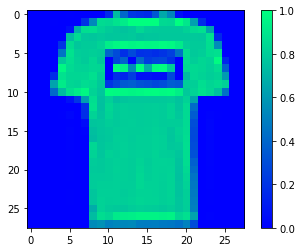

In [5]:
plt.imshow(train_images[1],cmap="winter")
plt.colorbar()
plt.show()

The colorbar now shows the difference in range values. What was once **255** is now between **0 and 1**.

***
## Reshaping and why
***
A convolutional layer requires to now how many color channels are in a given image. Typically there are only ever need three, corresponding to all colors are just shades of red, green, and blue. However because this greyscale is white or black on a scale of 0 to 1, we will reshape our 60,000 strong dataset into 60,000, 28 x 28 pixel, with 1 channel.

It is now a 3d tensor with 28 by 28 dimensions and one value thick.

In [6]:
shape_of_image = train_images.shape[0]
print(shape_of_image)
trainx = train_images.reshape(train_images.shape[0],28,28,1)
print(trainx.shape)
testx = test_images.reshape(test_images.shape[0],28,28,1)

60000
(60000, 28, 28, 1)


# One Hot encoded in one line

In [7]:
trainy = keras.preprocessing.utils.to_categorical(train_labels)
testy = keras.preprocessing.utils.to_categorical(test_labels)
print(trainy[np.random.randint(1,60000)])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


***
# Model Building
***
* As per mine decision I decided to demonstrate my knowledge of Tensorflow using one of the more complicated network architechtures as a CNN.
* It should demonstrate Max Pooling, Strides and filters and their functions.

***
### CNN Features
***
* Firstly a CNN layer has a filter and stride
* **Filters** are a matrix of a defined size that will be applied to an actvation algorithm that will return one value that will take the place in the next layer input.
* **Stride** simply ask how many pixels over should the filter shift before being applied to the next filter size in the original image.
* And finally **Max Pooling** simply takes the maximum value (based on a defined filter size) of a filter and just reshapes the image to one pixel which is the max value of that filter.

The images are all 28 by 28 pixels of one color where the "colors" of the image are ranges from 0 to 1. This input will given to my model.

In [8]:
model = keras.Sequential() # A format that lays the next code as 
                        # a model being built layer by layer as it is read
model.add(keras.layers.Conv2D(32, (3,3), activation="relu",input_shape=(28,28,1)))

# Conv2D( output size, dimension of filter map, activation algo, shape of input)
# shape of input requires dimension of object including color channel

This first Convulution layer has a "relu" activation. For a more exstensive explanation look [here](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) . The vanishing gradient problem essentially states that backpropogation will eventually in very deep nueral nets return gradients with **incredibly** small gradients effectively making the weights to not change at all.

The *relu* activation retifies this.

## The Rest of the Model

In [9]:
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # softmax is the sigmoid activation function

## Optimizer and Compilation

In [10]:
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9)
# Stochastic gradient descent, learning rate
# momentum is the rate at which a optimizer will *fall* in the gradient direction

Before the model is trained it requires a:
***
### Compilation Layer
***
* **optimizer** = a class of optimizers and algo for it
* **loss function** = the object to minimize in the model
* **metrics**  = can be a list or one object of categorical information about your model and performance

In [11]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# the accuracy requires a predicted value to measure agains a true value

In [12]:
model.fit(trainx, trainy, epochs=10, batch_size=32, validation_data=(testx, testy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 37s 620us/step - loss: 0.4802 - accuracy: 0.8276 - val_loss: 0.3463 - val_accuracy: 0.8731
Epoch 2/10
60000/60000 [==============================] - 40s 667us/step - loss: 0.3098 - accuracy: 0.8869 - val_loss: 0.3003 - val_accuracy: 0.8921
Epoch 3/10
60000/60000 [==============================] - 38s 635us/step - loss: 0.2655 - accuracy: 0.9020 - val_loss: 0.2873 - val_accuracy: 0.8964
Epoch 4/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.2394 - accuracy: 0.9119 - val_loss: 0.2756 - val_accuracy: 0.8972
Epoch 5/10
60000/60000 [==============================] - 33s 553us/step - loss: 0.2145 - accuracy: 0.9200 - val_loss: 0.2710 - val_accuracy: 0.9012
Epoch 6/10
60000/60000 [==============================] - 32s 527us/step - loss: 0.1965 - accuracy: 0.9271 - val_loss: 0.2600 - val_accuracy: 0.9067
Epoch 7/10
60000/60000 [==============================] 

In [13]:
info_pd = pd.DataFrame(model.history.history)
info_pd.head()
info_pd = info_pd.rename(columns={"val_loss":"Error on Testing Set",
                       "val_accuracy":"Accuracy on Testing Set",
                       "loss":"Loss based on Training Data",
                       "accuracy":"Accuracy on Training Data"})

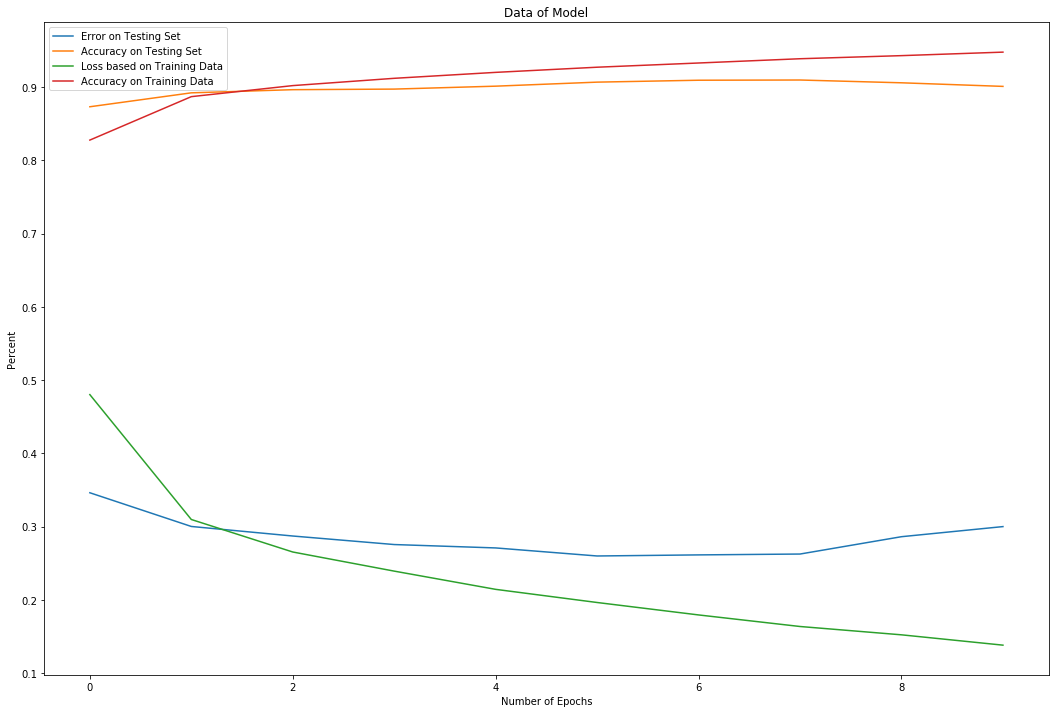

In [14]:
ax = info_pd.plot(figsize=(18,12))
ax.set_ylabel("Percent")
ax.set_xlabel("Number of Epochs")
ax.set_title("Data of Model")
plt.show()